In [731]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import collections
import json
from sklearn.base import clone
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.cross_validation import StratifiedShuffleSplit, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from datacleaner import autoclean
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import Imputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.cross_validation import cross_val_score
import numpy as np
from IPython.display import Image
from lime import lime_text, lime_tabular

In [255]:
def flatten_dict(l):
    d = {}
    for k, v in l.items():
        if isinstance(v, collections.Mapping):
            d.update(flatten_dict(v))
        elif isinstance(v, list) or isinstance(v, tuple):
            for i, l in enumerate(v):
                d[k+'_{}'.format(i)] = l
        else:
            d[k] = v
    return d

def plot_imp(names, values, k=None):
    ind = np.argsort(values)
    ind = ind[::-1]
    if k:
        ind = ind[0:k]
    values = map(lambda i:values[i], ind)
    names = map(lambda i:names[i], ind)
    ind = (np.arange(len(names)))
    plt.xticks(ind + 0.5, names)
    plt.bar(ind, values, width=1)
    plt.xlabel('variable index')
    plt.ylabel('importance')

In [148]:
df_ = pd.read_csv('http://134.158.75.73:20000/export_data')

In [764]:
df = df_.copy()
colnames = set()
for i in range(len(df)):
    h = df['hypers'].iloc[i]
    h = json.loads(h)
    h = flatten_dict(h)
    colnames |= set(h.keys())
colnames = list(colnames)
print(colnames)
for col in colnames:
    df[col] = df.apply(lambda r:flatten_dict(json.loads(r['hypers'])).get(col), axis=1)
#df['nb_filters']

[u'nb_filters_4', u'nb_filters_1', u'nb_filters_0', u'nb_filters_3', u'budget_hours', u'merge_op', u'wta_lifetime_perc', u'dataset', u'filter_size', u'marginalized', u'eval_stats_0', u'walkback_jump', u'wta_channel_stride', u'out_nonlin', u'binarize_thresh', u'force_w', u'use_channel', u'use_wta_spatial', u'denoise', u'nb_filters_2', u'use_wta_sparse', u'nb_filters_mul', u'force_h', u'initial_lr', u'use_wta_channel', u'algo', u'noise', u'weight_sharing', u'max_nb_epochs', u'tied', u'use_spatial', u'autoencoding_loss', u'walkback_mode', u'contractive', u'nb_layers', u'spatial_k', u'contractive_coef', u'channel_stride', u'nb_hidden_units', u'walkback', u'wta_sparse_perc', u'use_wta_lifetime', u'mode', u'model_name']


In [962]:
X_ = df[colnames]
X_ = X_.fillna(-1)
y = df['label']
X = pd.get_dummies(X_)
X

,nb_filters_4,nb_filters_1,nb_filters_0,nb_filters_3,budget_hours,wta_lifetime_perc,filter_size,marginalized,wta_channel_stride,binarize_thresh,...,use_wta_lifetime_True,mode_-1,mode_minibatch,mode_random,model_name_model55,model_name_model56,model_name_model57,model_name_model59,model_name_model64,model_name_model73
0,-1.0,-1.0,-1.0,-1.0,10,0.150000,-1.0,False,-1.0,0.5,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-1.0,-1.0,-1.0,-1.0,7,0.103448,-1.0,False,-1.0,-1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,64.0,16.0,16.0,32.0,6,-1.000000,5.0,False,2.0,-1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-1.0,-1.0,-1.0,-1.0,6,-1.000000,-1.0,False,-1.0,-1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-1.0,-1.0,-1.0,-1.0,6,-1.000000,-1.0,False,-1.0,-1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,-1.0,-1.0,-1.0,-1.0,10,-1.000000,-1.0,False,-1.0,-1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,-1.0,16.0,8.0,32.0,6,-1.000000,5.0,False,4.0,-1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,-1.0,16.0,8.0,32.0,6,-1.000000,5.0,False,4.0,-1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,-1.0,-1.0,-1.0,-1.0,7,-1.000000,-1.0,False,-1.0,-1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,-1.0,128.0,32.0,-1.0,6,-1.000000,5.0,False,4.0,-1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [963]:
X_vect = X.values
y_vect = y.values
cols = (X.columns.values)
class_names = sorted(y.unique())

In [987]:
clf = Pipeline([
    #('imp', Imputer()),
    ('clf', 
         #RandomForestClassifier(n_estimators=200, max_depth=7)
         #LogisticRegression()
         DecisionTreeClassifier(max_depth=4)#max_leaf_nodes=20
         #RidgeClassifier(alpha=2000000)
         #DummyClassifier(strategy='most_frequent')
         #SVC(kernel='rbf', C=1000000)
    )
])
acc = []
#for train, test in StratifiedShuffleSplit(y, n_iter=10, test_size=0.9, random_state=2):
for train, test in StratifiedKFold(y_vect, n_folds=2, shuffle=True, random_state=2):
    clf.fit(X_vect[train], y_vect[train])
    train_acc = (clf.predict(X_vect[train]) == y_vect[train]).mean()
    val_acc = (clf.predict(X_vect[test]) == y_vect[test]).mean()
    print(train_acc, val_acc)
    acc.append(val_acc)
    #fig = plt.figure(figsize=(20, 5))
    #plot_imp(cols, clf.named_steps['clf'].feature_importances_, k=10)
    #plt.show()
print(np.mean(acc), np.std(acc))
export_graphviz(clf.named_steps['clf'], 
                out_file='tree.dot', label='none',
                feature_names=cols, class_names=class_names,
                filled=True)

(0.6972111553784861, 0.59288537549407117)
(0.69565217391304346, 0.62151394422310757)
(0.60719965985858937, 0.014314284364518204)


In [988]:
!dot -Tpng tree.dot -o tree.png 

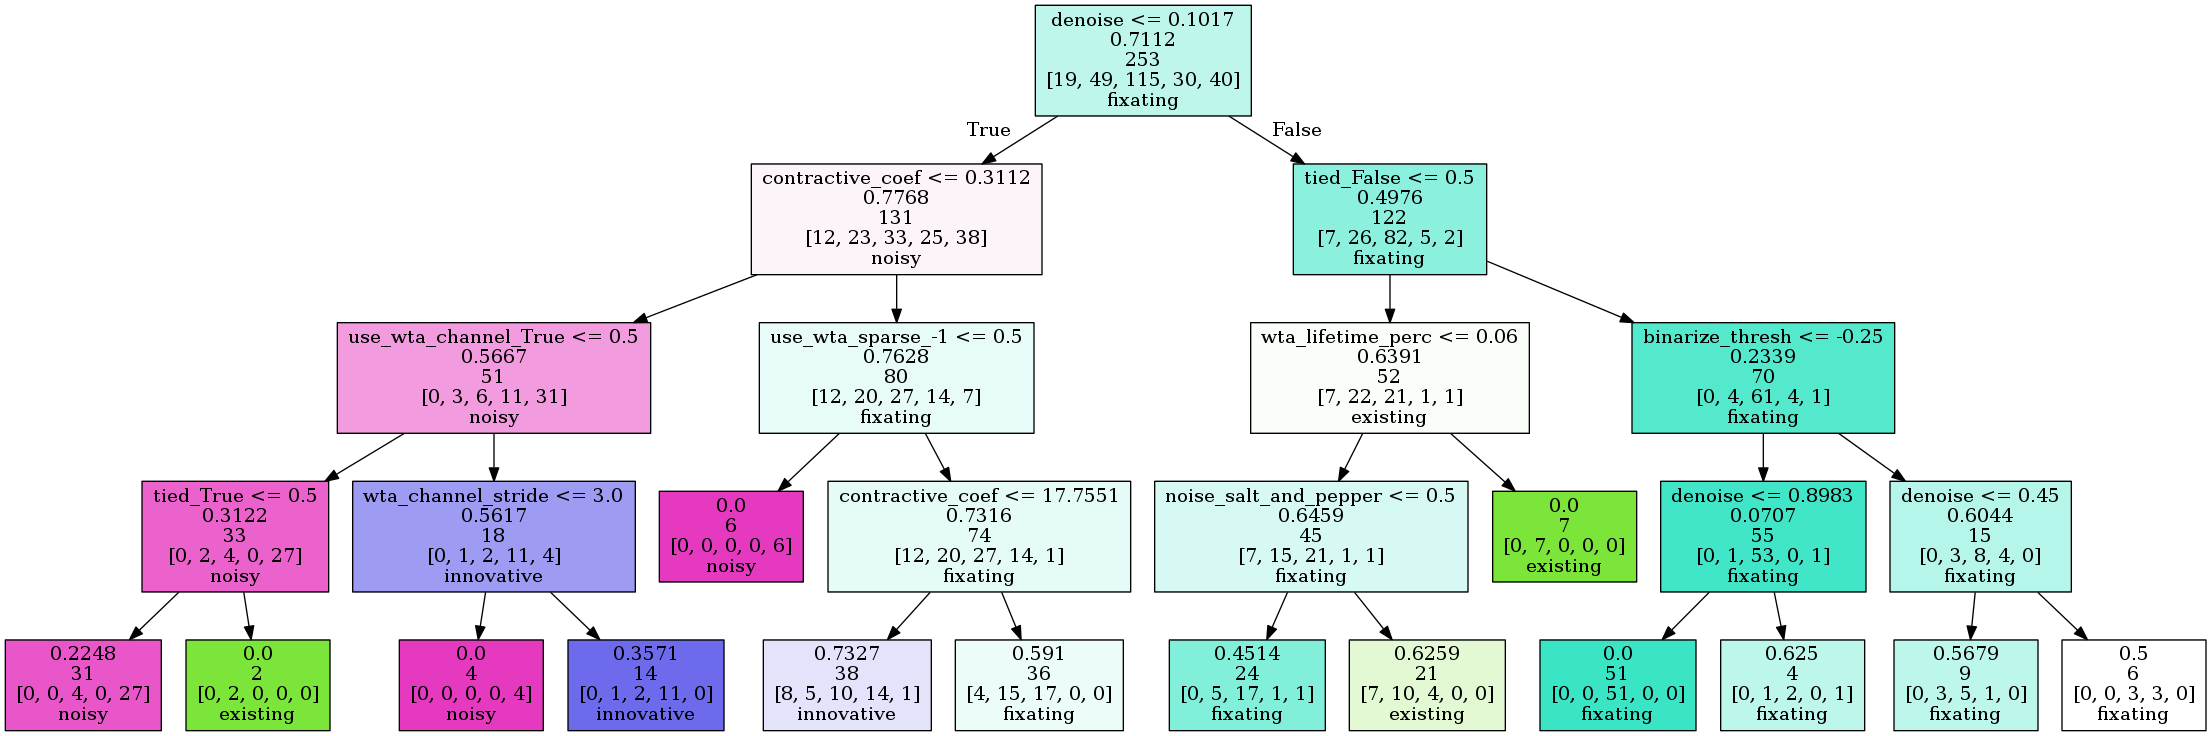

In [989]:
Image('tree.png')

In [981]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_vect[train], 
    feature_names=cols, 
    class_names=class_names, 
    discretize_continuous=True)

In [1086]:
cls = 'noisy'
y_test_predicted = clf.predict(X_vect[test])
v = X_vect[test][y_test_predicted==cls]
idx = np.random.randint(0, len(v))
exp = explainer.explain_instance(v[idx], clf.predict_proba, num_features=5, top_labels=1)
exp.show_in_notebook(show_table=True, show_all=False)

print(y_vect[test][y_test_predicted==cls][idx])

noisy


c2577aaca65df0c99aba51d6c346efdc


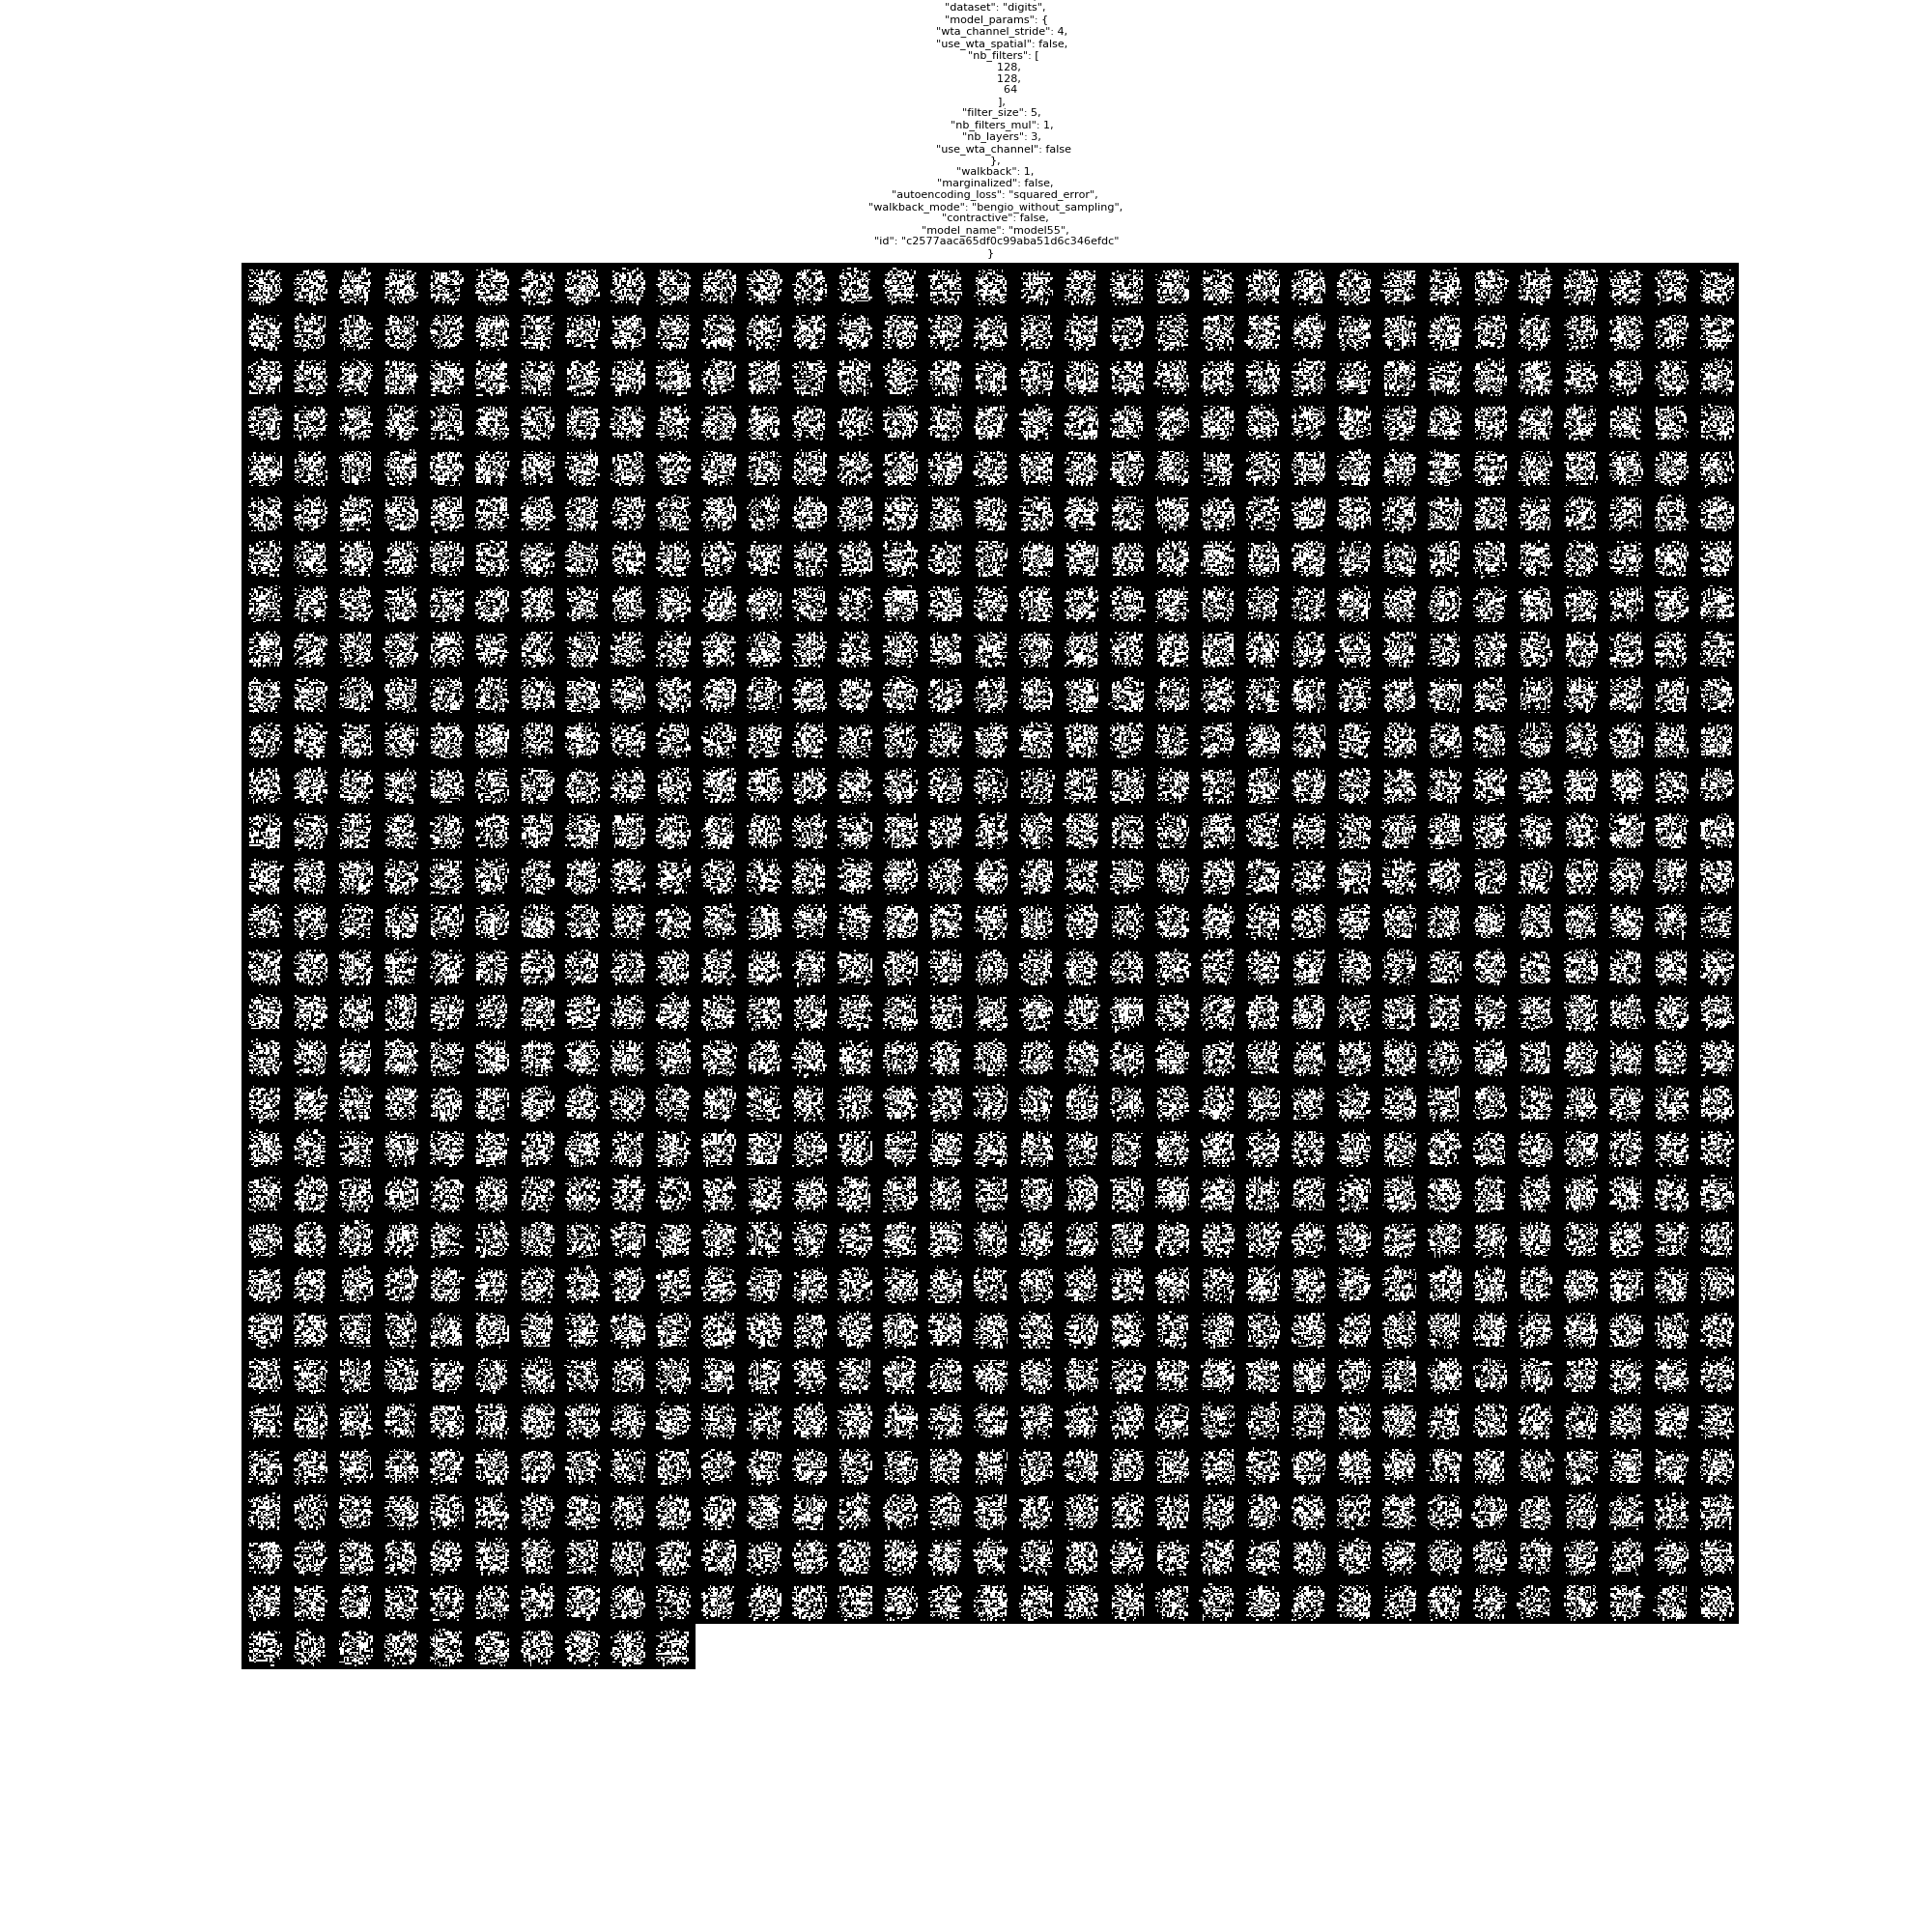

In [1087]:
model_id = df.iloc[test][y_test_predicted==cls]['id'].iloc[idx]
print(model_id)
model_img = '../../annot/imgs/models/{}.png'.format(model_id)
Image(model_img, width=800, height=800)